### MovieLens Dataset analysis

# Overview
- Reading the data
- Data analysis
- Clean gurbage data
- Data visualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from wordcloud import WordCloud, STOPWORDS #used to generate world cloud
pd.set_option('mode.chained_assignment', None)

startTime = time.time()
movies = pd.read_csv("20M/movies.csv")
ratings = pd.read_csv("20M/ratings.csv")
links = pd.read_csv("20M/links.csv")
tags = pd.read_csv("20M/tags.csv")
# genomeScores = pd.read_csv("20M/genome-scores.csv")
# genomeTags = pd.read_csv("20M/genome-tags.csv")
print("It took %s seconds to load the data" % (time.time() - startTime))

It took 3.903769016265869 seconds to load the data


Exploring the data
As links only contains the url parts, we won't use it in our models

## Data cleaning & analysis

In [2]:
print(movies.shape)
print(ratings.shape)
print(links.shape)
print(tags.shape)

(27278, 3)
(20000263, 4)
(27278, 3)
(465564, 4)


In [3]:
movies.isnull().any()

movieId    False
title      False
genres     False
dtype: bool

In [4]:
ratings.isnull().any()

userId       False
movieId      False
rating       False
timestamp    False
dtype: bool

In [5]:
tags.isnull().any()  # tag has some null value, so we will remove it from the dataset

userId       False
movieId      False
tag           True
timestamp    False
dtype: bool

In [6]:
tags = tags.dropna()
tags.isnull().any()

userId       False
movieId      False
tag          False
timestamp    False
dtype: bool

In [7]:
del ratings['timestamp']
del tags['timestamp']

In [8]:
movies['year'] = movies['title'].str.extract('\\(([0-9]+)\\)$', expand = False)
movies

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995
...,...,...,...,...
27273,131254,Kein Bund für's Leben (2007),Comedy,2007
27274,131256,"Feuer, Eis & Dosenbier (2002)",Comedy,2002
27275,131258,The Pirates (2014),Adventure,2014
27276,131260,Rentun Ruusu (2001),(no genres listed),2001


In [9]:
movies.isnull().any()

movieId    False
title      False
genres     False
year        True
dtype: bool

In [10]:
movies = movies.dropna()
movies.isnull().any()

movieId    False
title      False
genres     False
year       False
dtype: bool

In [11]:
movies['year'] = movies['year'].astype(int)  # sorting separately after cleaning data, cause there can be null values

In [12]:
movies = movies.sort_values(by = 'year')
movies

,movieId,title,genres,year
27015,129851,Dickson Greeting (1891),(no genres listed),1891
19213,95541,Blacksmith Scene (1893),(no genres listed),1893
19085,94951,Dickson Experimental Sound Film (1894),Musical,1894
17631,88674,Edison Kinetoscopic Record of a Sneeze (1894),Documentary,1894
25546,120869,Employees Leaving the Lumière Factory (1895),Documentary,1895
...,...,...,...,...
27004,129820,Spare Parts (2015),Children|Drama,2015
26049,124867,Justice League: Throne of Atlantis (2015),Action|Animation,2015
26701,128488,Wild Card (2015),Crime|Drama|Thriller,2015
27067,130069,Road Hard (2015),Comedy,2015


## Data visualization

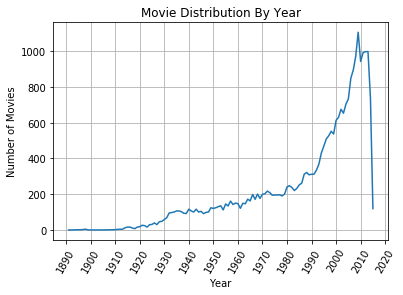

In [13]:
def movies_per_year():
    movie_year_count = movies.groupby('year').count()['movieId']
    plt.plot(movie_year_count)
    plt.xticks(np.arange(1890, 2015 + 10, 10), rotation=60)
    plt.grid()
    plt.ylabel("Number of Movies")
    plt.xlabel("Year")
    plt.title("Movie Distribution By Year")
    plt.show()
    

movies_per_year()

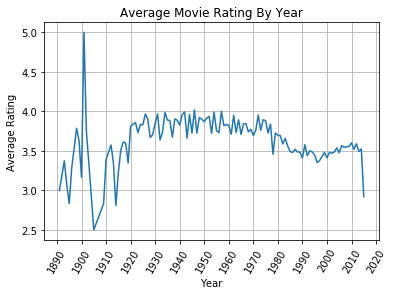

In [14]:
def ratings_per_year():
    result = pd.merge(movies[['movieId', 'year']], ratings[['movieId', 'rating']], on='movieId')
    avg_rating = result.groupby('year').rating.mean()
    plt.plot(avg_rating)
    plt.xticks(np.arange(1890, 2015 + 10, 10), rotation=60)
    plt.ylabel("Average Rating")
    plt.xlabel("Year")
    plt.title("Average Movie Rating By Year")
    plt.grid()
    plt.show()
    

ratings_per_year()

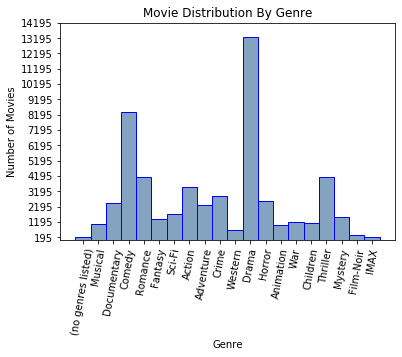

In [15]:
def movies_per_genre():
    moviesGenreCount = dict()
    for val in movies['genres'].values:
        for genre in val.strip().split('|'):
            if genre in moviesGenreCount:
                moviesGenreCount[genre] += 1
            else:
                moviesGenreCount[genre] = 1
    x, y = moviesGenreCount.keys(), moviesGenreCount.values()  # unpack a list of pairs into two tuples
    plt.bar(x, y, width=1.0, facecolor=(0.2, 0.4, 0.6, 0.6), edgecolor='blue')
    plt.xticks(rotation=80)
    plt.yticks(np.arange(min(y), max(y) + 1000, 1000))
    plt.ylabel("Number of Movies")
    plt.xlabel("Genre")
    plt.title("Movie Distribution By Genre")
    plt.show()
    
    
movies_per_genre()

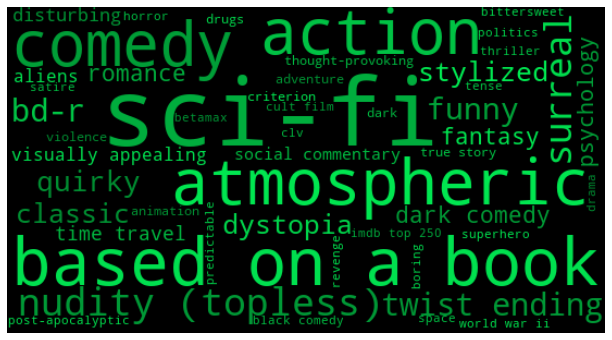

In [16]:
# define a function that counts the number of times each tag appear
def tags_data_parse():
    tag_count = dict()
    for tag in tags['tag']:
        tag = tag.lower()
        if tag in tag_count:
            tag_count[tag] += 1
        else:
            tag_count[tag] = 1
    tag_count = sorted(tag_count.items(), key = lambda x: x[1], reverse=True)
    return tag_count   


# Function that control the color of the words
def random_color_func(word=None, font_size=None, position=None,
                      orientation=None, font_path=None, random_state=None):
    tone = 100 # define the color of the words
    h = int(360.0 * tone / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(70, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)


def show_most_tagged():
    tag_count = dict(tags_data_parse()[0:50])
    f, ax = plt.subplots(figsize=(14, 6))
    wordcloud = WordCloud(width=550, height=300, background_color='black', 
                          max_words=50, relative_scaling=0.6,
                          color_func = random_color_func,
                          normalize_plurals=True)
    wordcloud.generate_from_frequencies(tag_count)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()
    
    
show_most_tagged()

Now we will show the most tagged movie

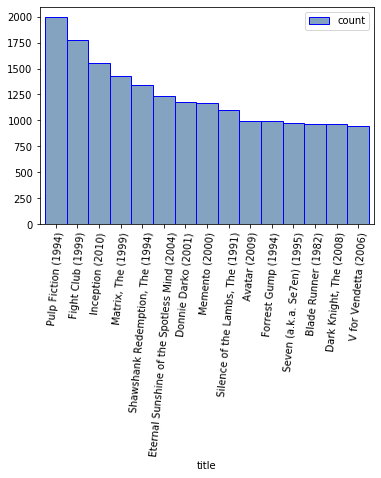

In [17]:
def movie_with_most_tags():
    result = pd.merge(movies[['movieId', 'title']], tags['movieId'], on='movieId')
    title_count = result.groupby('title')["movieId"].count().reset_index(name="count")
    title_count = title_count.sort_values('count', ascending=False)[0:15]
    title_count.plot.bar(x='title', y='count', width=1.0, facecolor=(0.2, 0.4, 0.6, 0.6), edgecolor='blue', rot=85)
    
    
movie_with_most_tags()

Most rated movies(popular)
Average rating of the most rated movies

                                        title  count  avgRating
0                         Pulp Fiction (1994)  67310   4.174231
1                         Forrest Gump (1994)  66172   4.029000
2            Shawshank Redemption, The (1994)  63366   4.446990
3            Silence of the Lambs, The (1991)  63299   4.177057
4                        Jurassic Park (1993)  59715   3.664741
5   Star Wars: Episode IV - A New Hope (1977)  54502   4.190672
6                           Braveheart (1995)  53769   4.042534
7           Terminator 2: Judgment Day (1991)  52244   3.931954
8                          Matrix, The (1999)  51334   4.187186
9                     Schindler's List (1993)  50054   4.310175
10                           Toy Story (1995)  49695   3.921240
11                       Fugitive, The (1993)  49581   3.985690
12                           Apollo 13 (1995)  47777   3.868598
13       Independence Day (a.k.a. ID4) (1996)  47048   3.370962
14                 Usual Suspects, The (

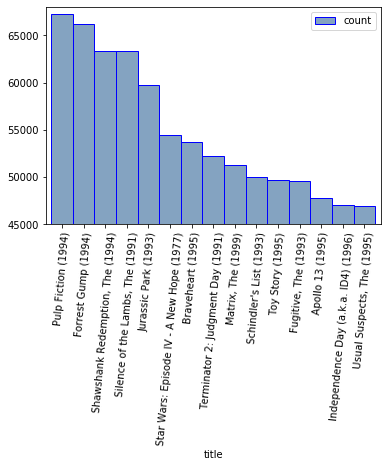

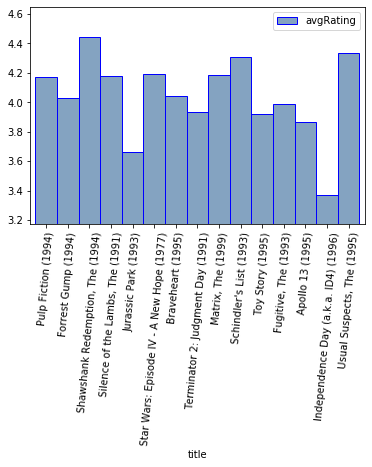

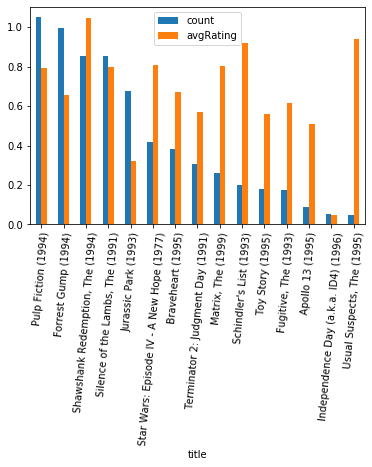

In [35]:
def movie_with_most_user_rating():
    result = pd.merge(movies[['movieId','title']], ratings[['movieId','rating']], on='movieId')
    rating_count = result.groupby(['title'])['movieId'].count().to_frame('count').reset_index()
    avg_rating = result.groupby(['title'])['rating'].mean().to_frame('avgRating').reset_index()
    most_rated_movies = rating_count.sort_values('count', ascending=False)[0:15]
    top_avg_rating = pd.merge(most_rated_movies[['title','count']], avg_rating[['title','avgRating']], on='title')
    top_avg_rating.plot.bar(x='title', y='count', ylim=(45000, 68000),
                            width=1.0, facecolor=(0.2, 0.4, 0.6, 0.6), edgecolor='blue', rot=85)
    top_avg_rating.plot.bar(x='title', y='avgRating', ylim=(min(top_avg_rating.avgRating)-0.2, max(top_avg_rating.avgRating)+0.2),
                            width=1.0, facecolor=(0.2, 0.4, 0.6, 0.6), edgecolor='blue', rot=85)
    top_avg_rating[['count']] = top_avg_rating[['count']].apply(lambda x: (x - x.min() + 1000) / (x.max() - x.min()))
    top_avg_rating[['avgRating']] = top_avg_rating[['avgRating']].apply(lambda x: (x - x.min() + .05) / (x.max() - x.min()))
    top_avg_rating.plot.bar(x='title', y=['count','avgRating'], rot=85)

movie_with_most_user_rating()

Rating summary

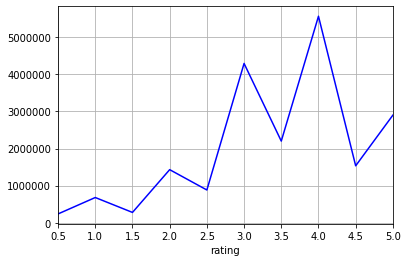

In [19]:
def rating_summary():
    result = ratings.groupby('rating')['movieId'].count()
    result.plot(grid=True, color='blue')
    
rating_summary()

In [20]:
print("It took %s seconds for the whole process" % (time.time() - startTime))

It took 17.127477884292603 seconds for the whole process
